In [1]:
%pylab inline
import pandas as pd
import uproot
import awkward as ak
from yahist import Hist1D
from yahist.utils import plot_stack
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

Populating the interactive namespace from numpy and matplotlib


In [58]:
t_balaji = uproot.open("../output.root")["t"]
df_balaji = t_balaji.arrays(library="pd")

In [3]:
t_franny = uproot.open("/home/users/fsetti/HggNanoAnalysis/synch/synch_out.root")["Events"]
df_franny = t_franny.arrays(library="pd")

In [4]:
common_branches = np.intersect1d(t_franny.keys(), t_balaji.keys())

In [5]:
common_branches

array(['Category', 'MET_phi', 'MET_pt', 'eta_tautau_SVFit',
       'eta_tautau_vis', 'g1_eta', 'g1_idmva', 'g1_phi', 'g1_pixVeto',
       'g1_pt', 'g1_ptmgg', 'g2_eta', 'g2_idmva', 'g2_phi', 'g2_pixVeto',
       'g2_pt', 'g2_ptmgg', 'gg_dPhi', 'gg_dR', 'gg_eta', 'gg_phi',
       'gg_pt', 'jet1_bTag', 'jet1_eta', 'jet1_id', 'jet1_pt',
       'jet2_bTag', 'jet2_eta', 'jet2_id', 'jet2_pt', 'lep12_deta',
       'lep12_dphi', 'lep1_charge', 'lep1_eta', 'lep1_id_vs_e',
       'lep1_id_vs_m', 'lep1_phi', 'lep1_pt', 'lep1_tightID',
       'lep2_charge', 'lep2_eta', 'lep2_id_vs_e', 'lep2_id_vs_m',
       'lep2_phi', 'lep2_pt', 'lep2_tightID', 'm_tautau_SVFit',
       'm_tautau_vis', 'mgg', 'n_bjets', 'n_jets', 'phi_tautau_SVFit',
       'phi_tautau_vis', 'process_id', 'pt_tautau_SVFit', 'pt_tautau_vis',
       'weight', 'year'], dtype='<U20')

In [6]:
process_ids = {}
process_ids["Data"] = 0
process_ids["HH_ggTauTau"] = -1
process_ids["HH_ggZZ"] = -2
process_ids["HH_ggWW_dileptonic"] = -3
process_ids["HH_ggWW_semileptonic"] = -4
process_ids["DiPhoton"] = 3
process_ids["GJets"] = 8
process_ids["TTGG"] = 7
process_ids["TTGamma"] = 6
process_ids["TTbar"] = 5
process_ids["VH"] = 9
process_ids["WGamma"] = 4
process_ids["ZGamma"] = 2
process_ids["ttH"] = 10
process_ids["ggH"] = 11
process_ids["VBFH"] = 12

In [7]:
is_resonant = {}

is_resonant["Data"] = False
is_resonant["DiPhoton"] = False
is_resonant["GJets"] = False
is_resonant["HH_ggTauTau"] = True
is_resonant["HH_ggZZ"] = True
is_resonant["HH_ggWW_dileptonic"] = True
is_resonant["HH_ggWW_semileptonic"] = True
is_resonant["TTGG"] = False
is_resonant["TTGamma"] = False
is_resonant["TTbar"] = False
is_resonant["VH"] = True
is_resonant["WGamma"] = False
is_resonant["ZGamma"] = False
is_resonant["ttH"] = True
is_resonant["ggH"] = True
is_resonant["VBFH"] = True


'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


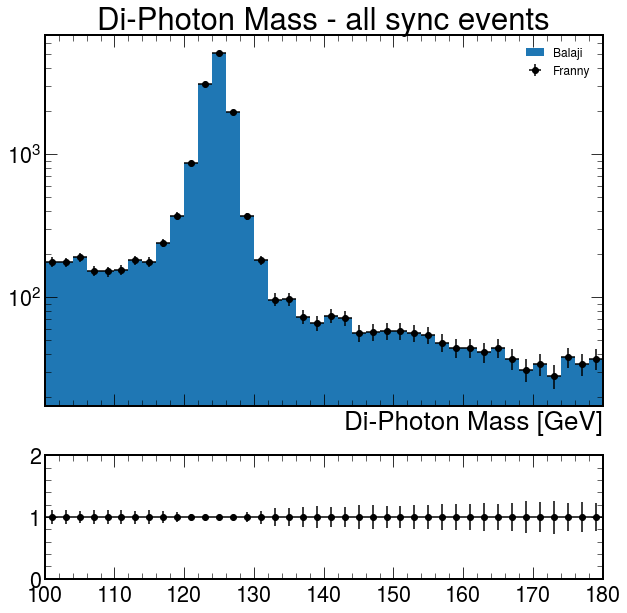

In [8]:
mgg_binning = "40,100,180" # ROOT convention


balaji_toFill = df_balaji["mgg"] # select by process, then select the quantity
franny_toFill = df_franny["mgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon Mass [GeV]")
plt.title("Di-Photon Mass - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("mgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


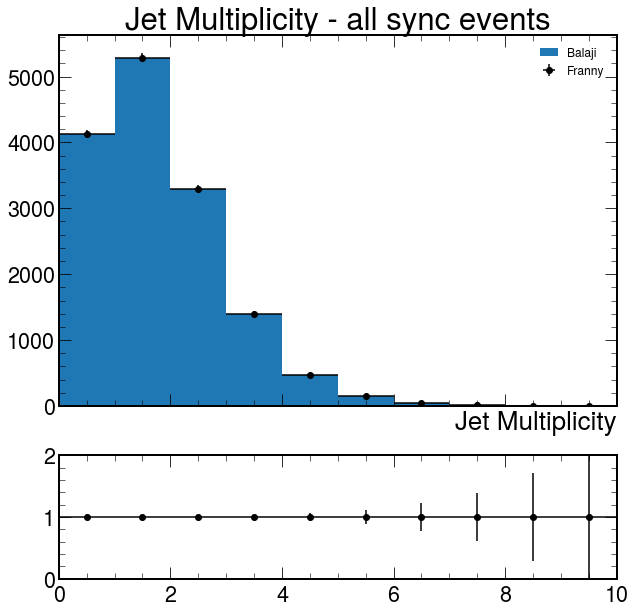

In [9]:
mgg_binning = "10,0,10" # ROOT convention


balaji_toFill = df_balaji["n_jets"] # select by process, then select the quantity
franny_toFill = df_franny["n_jets"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)

ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Jet Multiplicity")
plt.title("Jet Multiplicity - all sync events")
ax1.legend(fontsize=12)
plt.savefig("n_jet.pdf")

### Concerning distribution!!

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


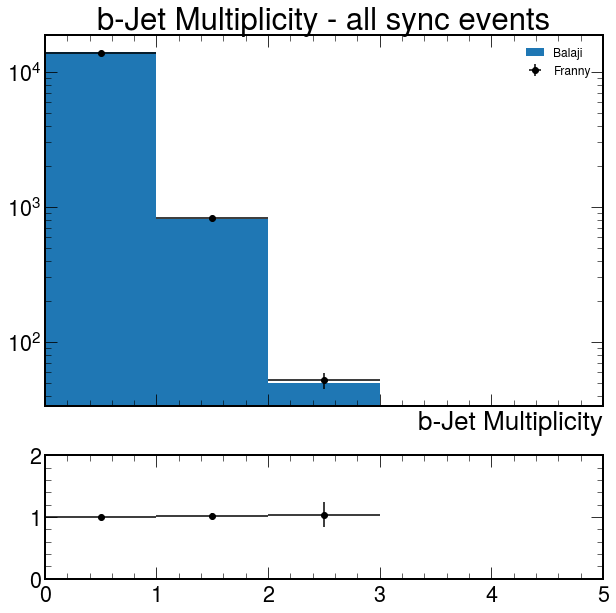

In [10]:
mgg_binning = "5,0,5" # ROOT convention


balaji_toFill = df_balaji["n_bjets"] # select by process, then select the quantity
franny_toFill = df_franny["n_bjets"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)

ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("b-Jet Multiplicity")
plt.title("b-Jet Multiplicity - all sync events")
ax1.legend(fontsize=12)
plt.savefig("n_bjet.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


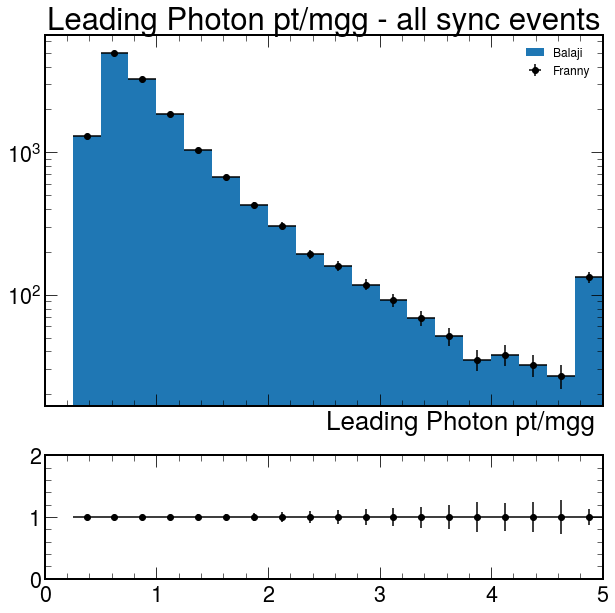

In [11]:
mgg_binning = "20,0,5" # ROOT convention


balaji_toFill = df_balaji["g1_ptmgg"] # select by process, then select the quantity
franny_toFill = df_franny["g1_ptmgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Photon pt/mgg ")
plt.title("Leading Photon pt/mgg - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("g1_ptmgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


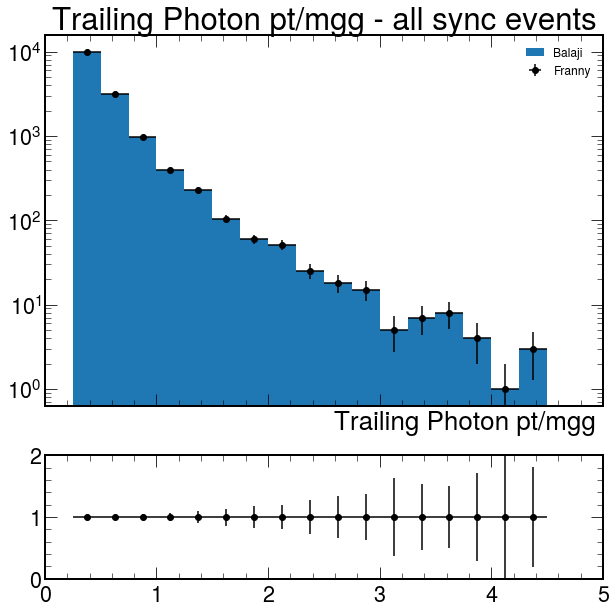

In [12]:
mgg_binning = "20,0,5" # ROOT convention


balaji_toFill = df_balaji["g2_ptmgg"] # select by process, then select the quantity
franny_toFill = df_franny["g2_ptmgg"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Photon pt/mgg ")
plt.title("Trailing Photon pt/mgg - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("g2_ptmgg.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


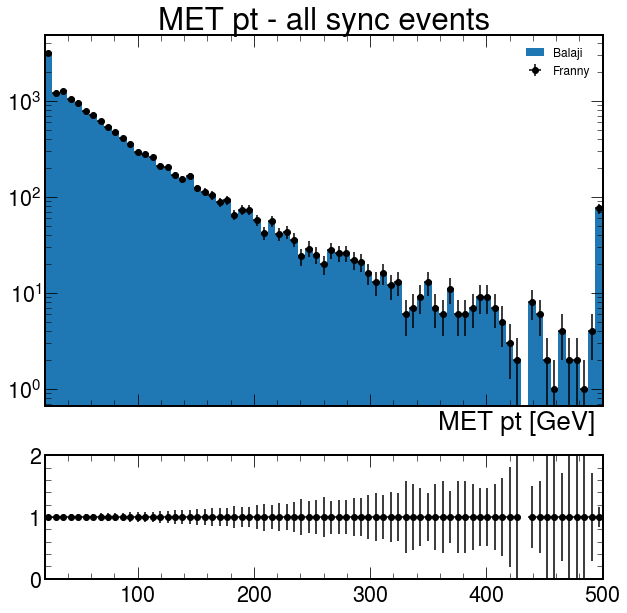

In [13]:
mgg_binning = "75,20,500" # ROOT convention


balaji_toFill = df_balaji["MET_pt"] # select by process, then select the quantity
franny_toFill = df_franny["MET_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("MET pt [GeV] ")
plt.title("MET pt - all sync events")
ax1.set_yscale("log")
ax1.legend(fontsize=12)
plt.savefig("MET_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


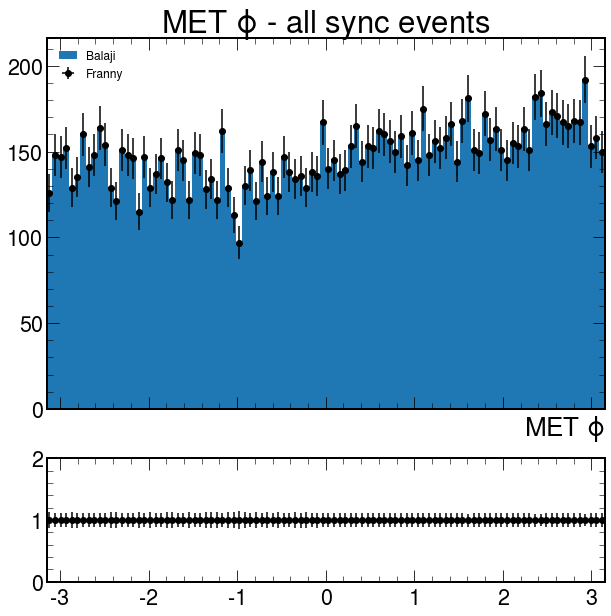

In [14]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["MET_phi"] # select by process, then select the quantity
franny_toFill = df_franny["MET_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("MET $\phi$")
plt.title("MET $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("MET_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


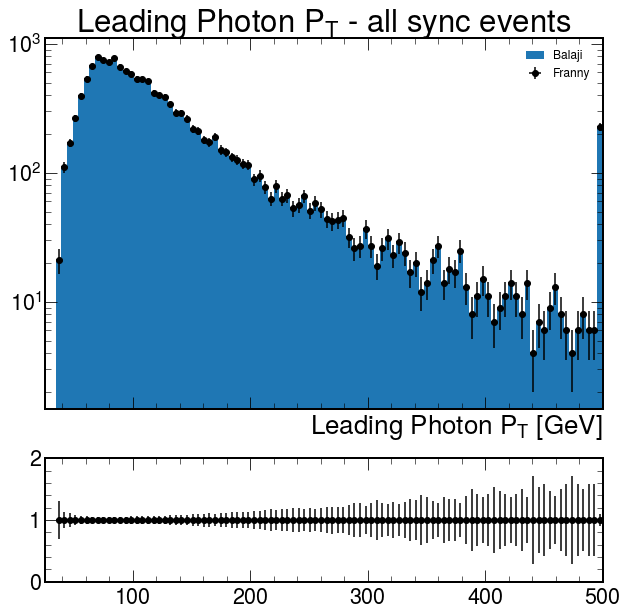

In [15]:
mgg_binning = "100, 25, 500" # ROOT convention


balaji_toFill = df_balaji["g1_pt"] # select by process, then select the quantity
franny_toFill = df_franny["g1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Photon $P_T$ [GeV]")
plt.title("Leading Photon $P_T$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


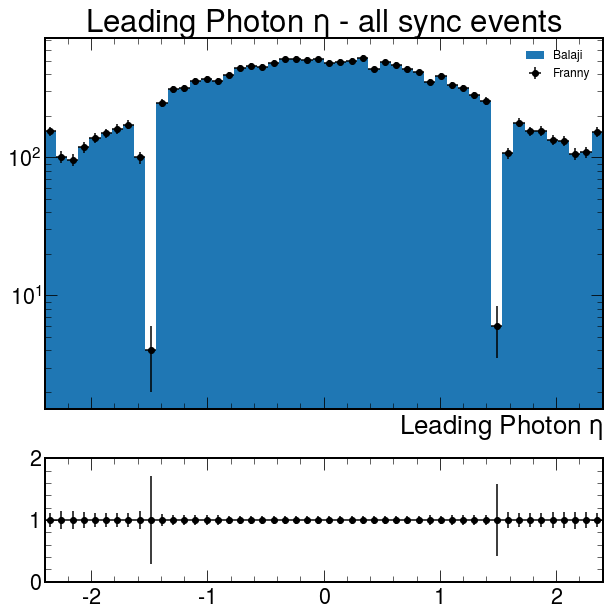

In [16]:
mgg_binning = "50, -2.4, 2.4" # ROOT convention


balaji_toFill = df_balaji["g1_eta"] # select by process, then select the quantity
franny_toFill = df_franny["g1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Photon $\eta$")
plt.title("Leading Photon $\eta$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


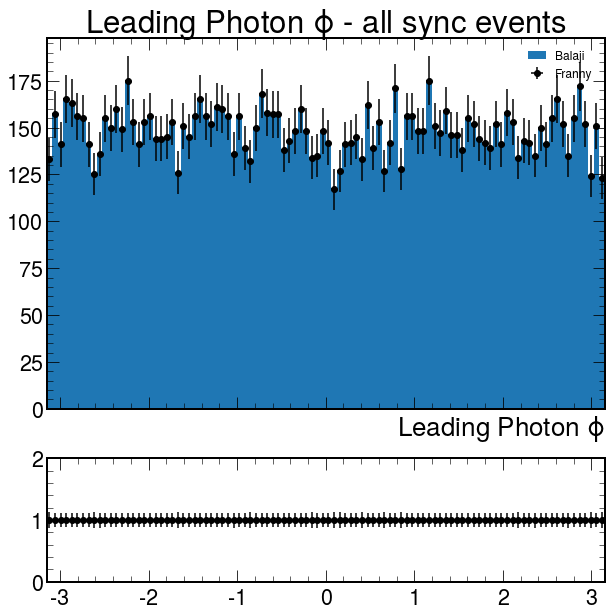

In [17]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["g1_phi"] # select by process, then select the quantity
franny_toFill = df_franny["g1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Photon $\phi$")
plt.title("Leading Photon $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g1_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


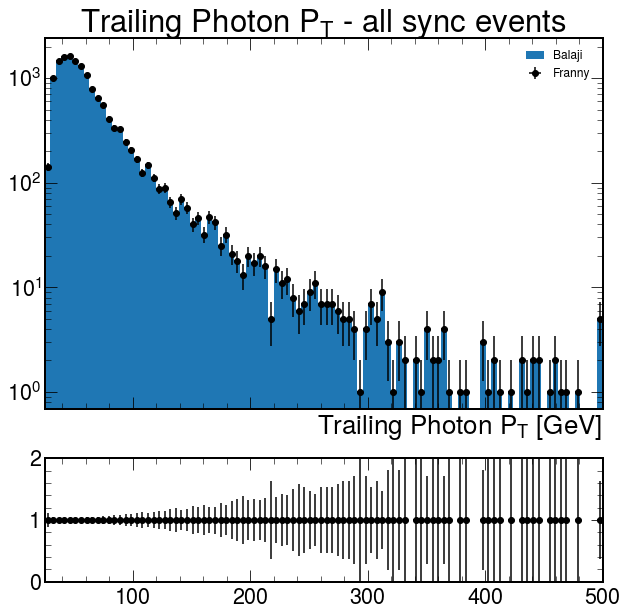

In [18]:
mgg_binning = "100, 25, 500" # ROOT convention


balaji_toFill = df_balaji["g2_pt"] # select by process, then select the quantity
franny_toFill = df_franny["g2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Photon $P_T$ [GeV]")
plt.title("Trailing Photon $P_T$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


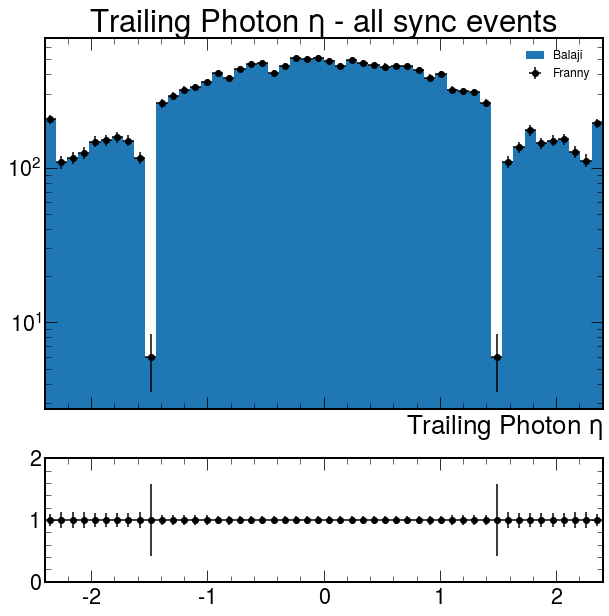

In [19]:
mgg_binning = "50, -2.4, 2.4" # ROOT convention


balaji_toFill = df_balaji["g2_eta"] # select by process, then select the quantity
franny_toFill = df_franny["g2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Photon $\eta$")
plt.title("Trailing Photon $\eta$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


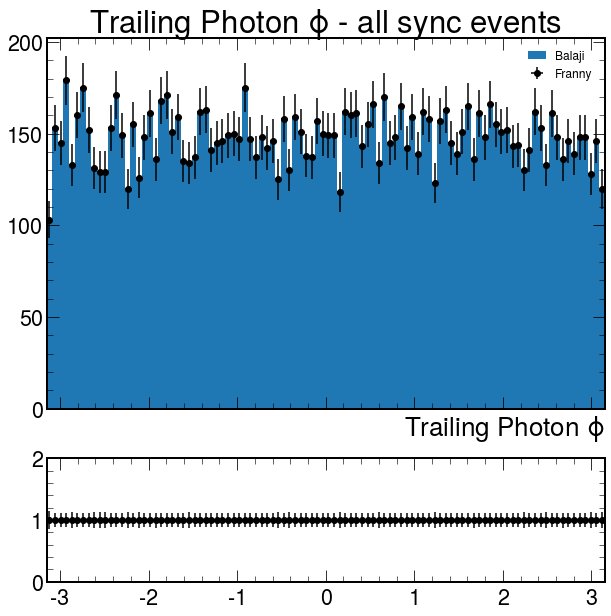

In [20]:
mgg_binning = "100,-3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji["g2_phi"] # select by process, then select the quantity
franny_toFill = df_franny["g2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Photon $\phi$")
plt.title("Trailing Photon $\phi$ - all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


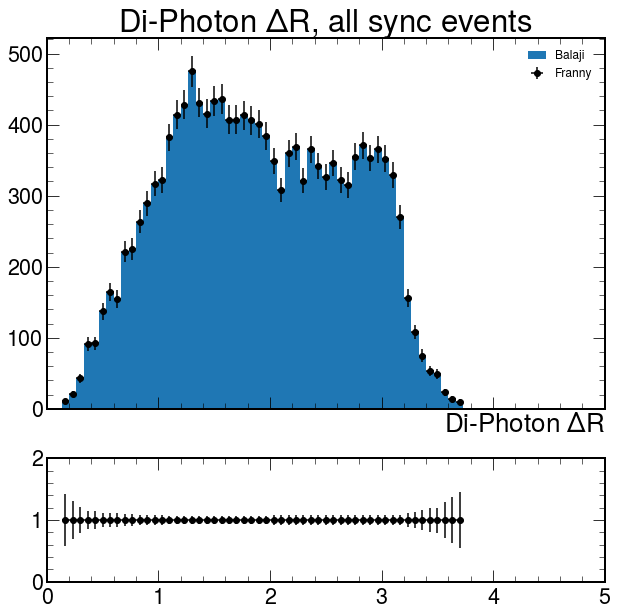

In [21]:
mgg_binning = "75,0,5" # ROOT convention


balaji_toFill = df_balaji["gg_dR"] # select by process, then select the quantity
franny_toFill = df_franny["gg_dR"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\Delta$R")
plt.title("Di-Photon $\Delta$R, all sync events")
ax1.legend(fontsize=12)
plt.savefig("g2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


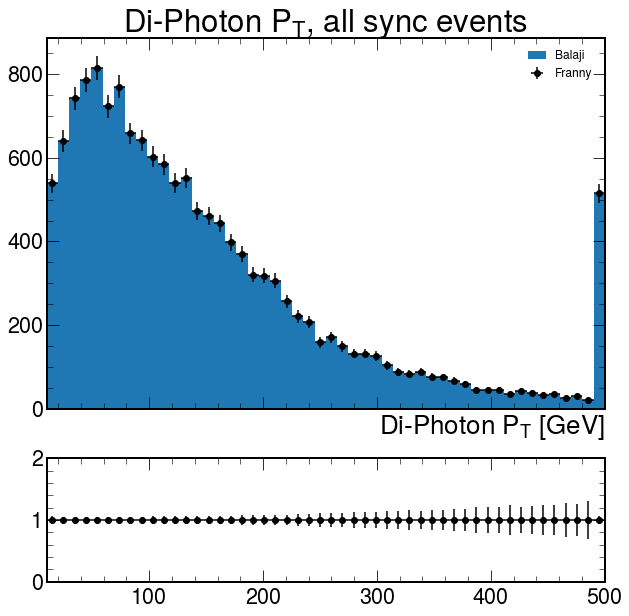

In [22]:
mgg_binning = "50,10,500" # ROOT convention


balaji_toFill = df_balaji["gg_pt"] # select by process, then select the quantity
franny_toFill = df_franny["gg_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $P_T$ [GeV]")
plt.title("Di-Photon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_dR.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


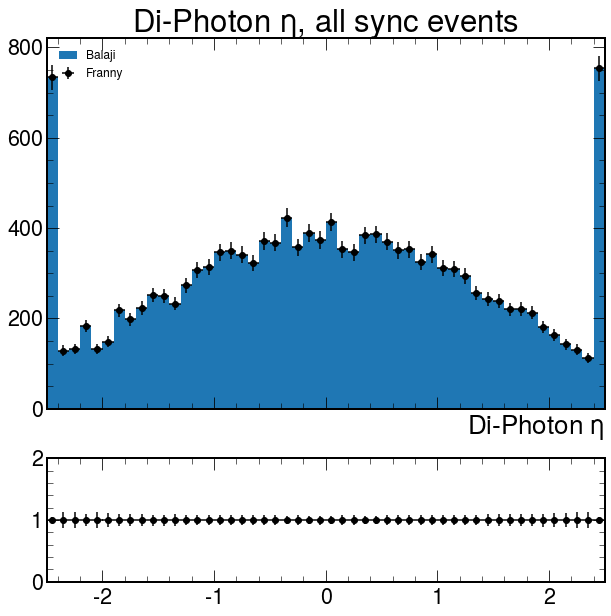

In [23]:
mgg_binning = "50,-2.5,2.5" # ROOT convention


balaji_toFill = df_balaji["gg_eta"] # select by process, then select the quantity
franny_toFill = df_franny["gg_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\eta$")
plt.title("Di-Photon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


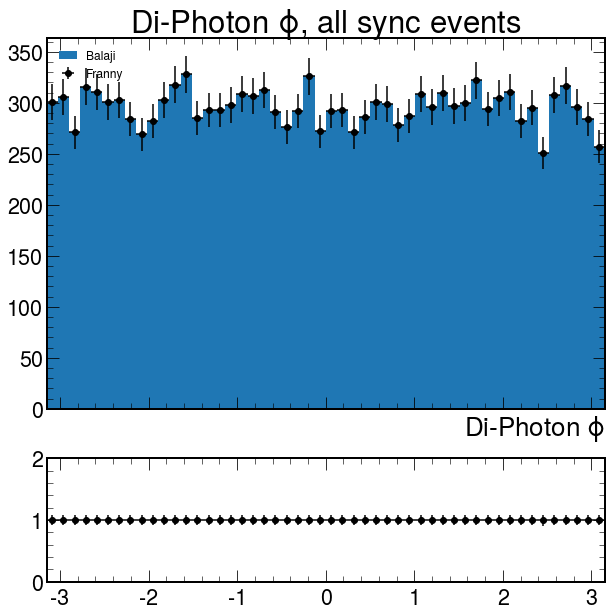

In [24]:
mgg_binning = "50,-3.15,3.15" # ROOT convention


balaji_toFill = df_balaji["gg_phi"] # select by process, then select the quantity
franny_toFill = df_franny["gg_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Di-Photon $\phi$")
plt.title("Di-Photon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


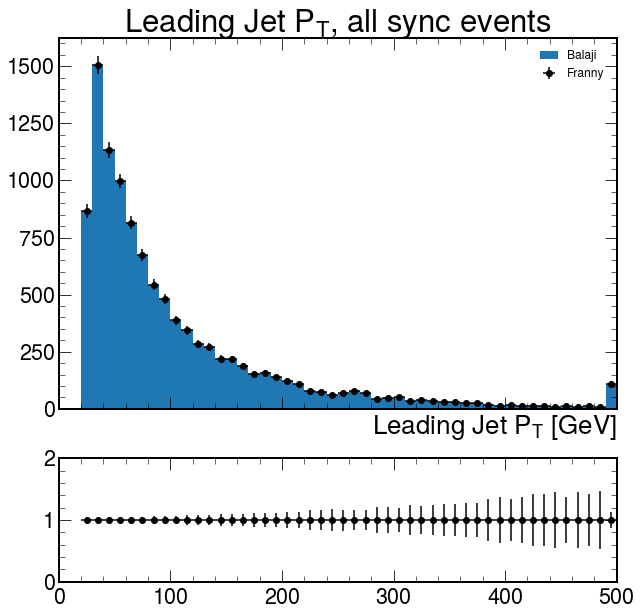

In [25]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet1_pt"] > 0, "jet1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet1_pt"] > 0, "jet1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Jet $P_T$ [GeV]")
plt.title("Leading Jet $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("gg_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


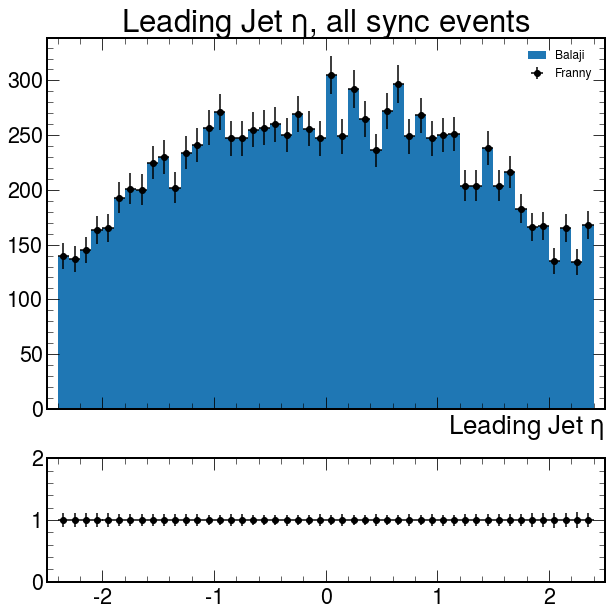

In [26]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet1_pt"] > 0, "jet1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet1_pt"] > 0, "jet1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Jet $\eta$")
plt.title("Leading Jet $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


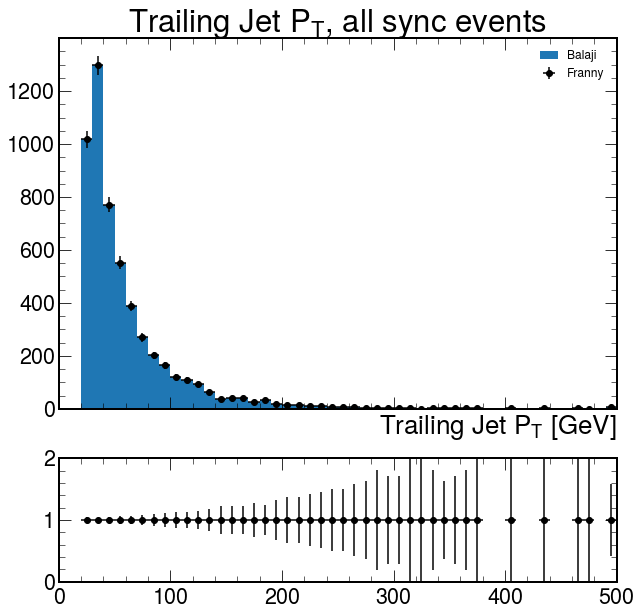

In [27]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet2_pt"] > 0, "jet2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet2_pt"] > 0, "jet2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Jet $P_T$ [GeV]")
plt.title("Trailing Jet $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


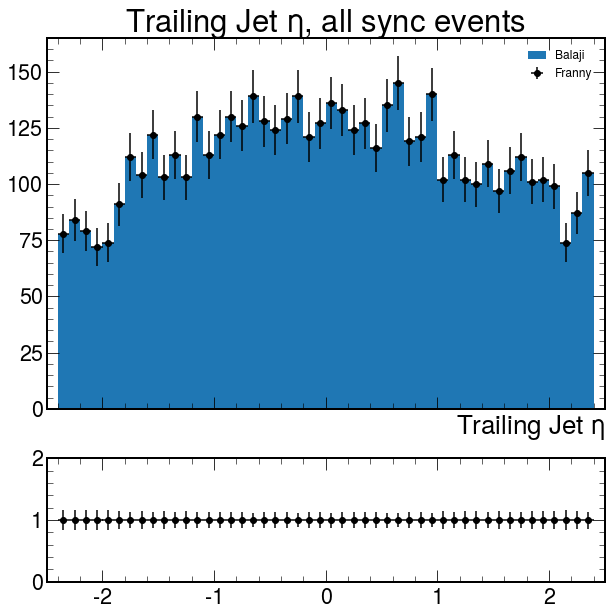

In [28]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["jet2_pt"] > 0, "jet2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["jet2_pt"] > 0, "jet2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Jet $\eta$")
plt.title("Trailing Jet $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


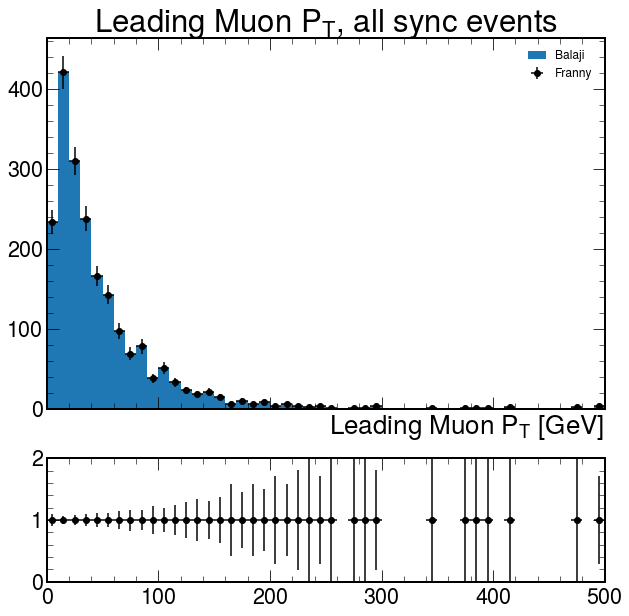

In [29]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 13, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $P_T$ [GeV]")
plt.title("Leading Muon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("jet2_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


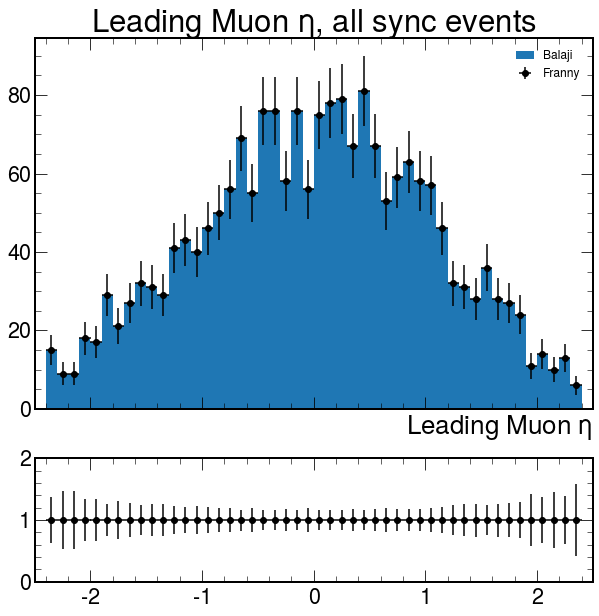

In [30]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 13, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $\eta$")
plt.title("Leading Muon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


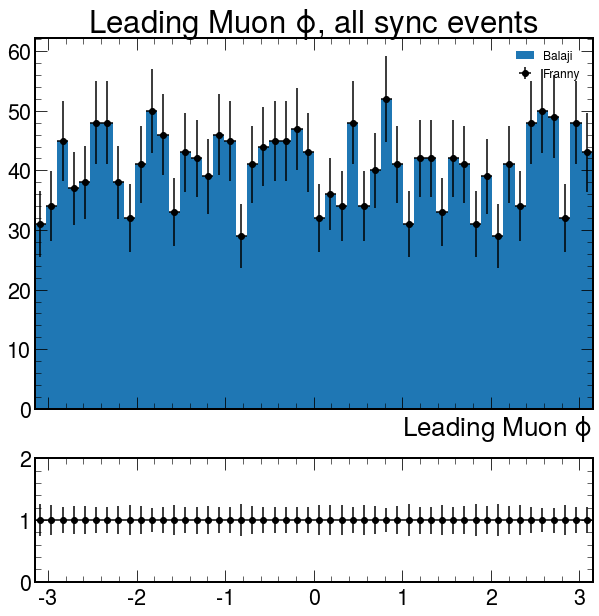

In [31]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 13, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 13 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Muon $\phi$")
plt.title("Leading Muon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


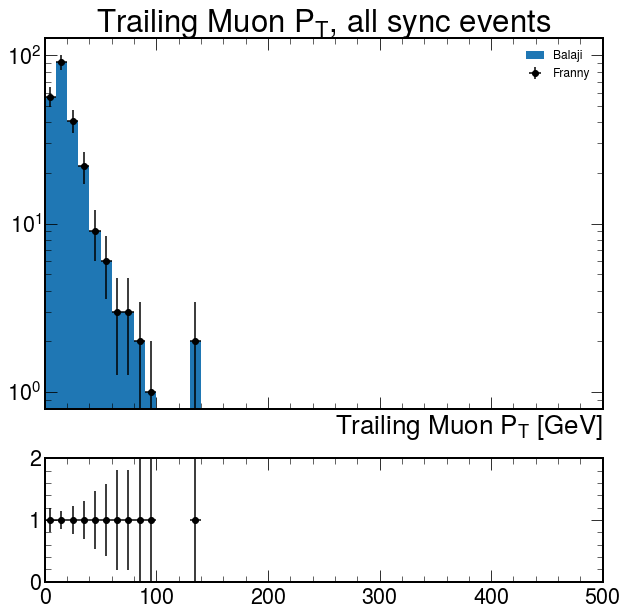

In [32]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 13, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Muon $P_T$ [GeV]")
plt.title("Trailing Muon $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon1_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


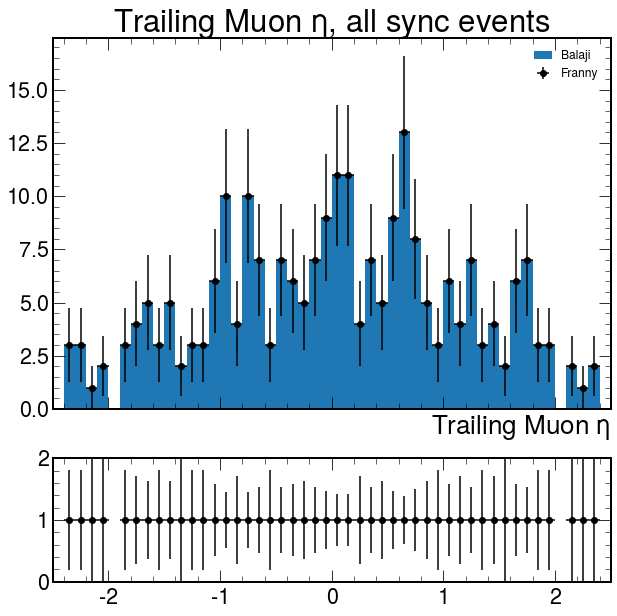

In [33]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 13, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Muon $\eta$")
plt.title("Trailing Muon $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


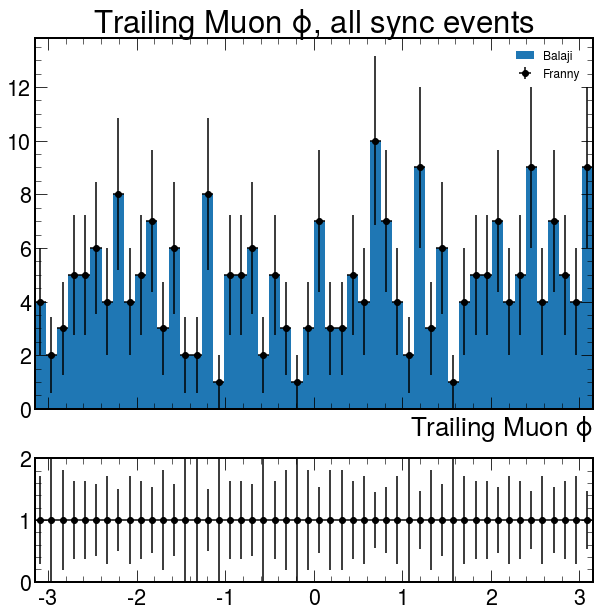

In [34]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 13, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 13 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Muon $\phi$")
plt.title("Trailing Muon $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("muon2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


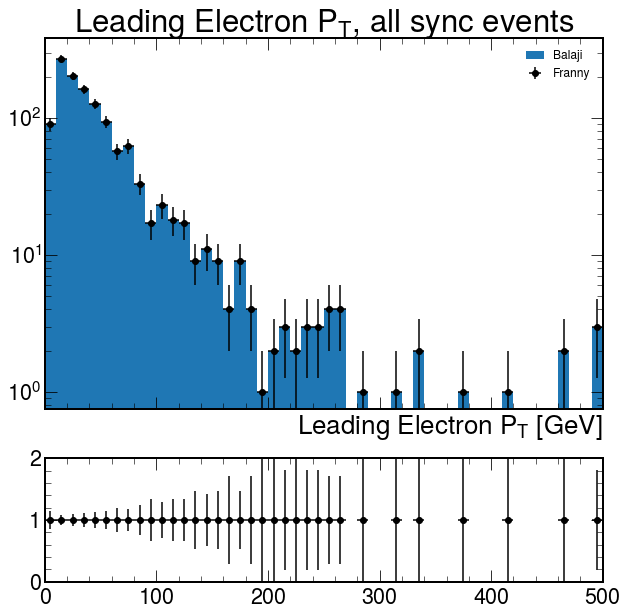

In [35]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 11, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Electron $P_T$ [GeV]")
plt.title("Leading Electron $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


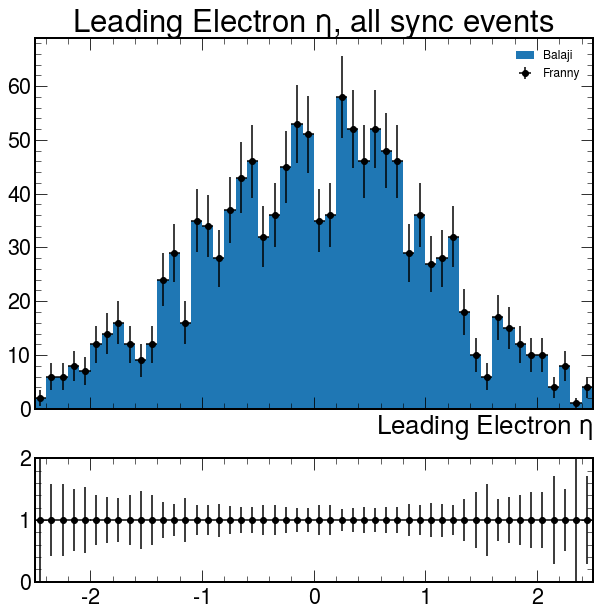

In [36]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 11, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Electron $\eta$")
plt.title("Leading Electron $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


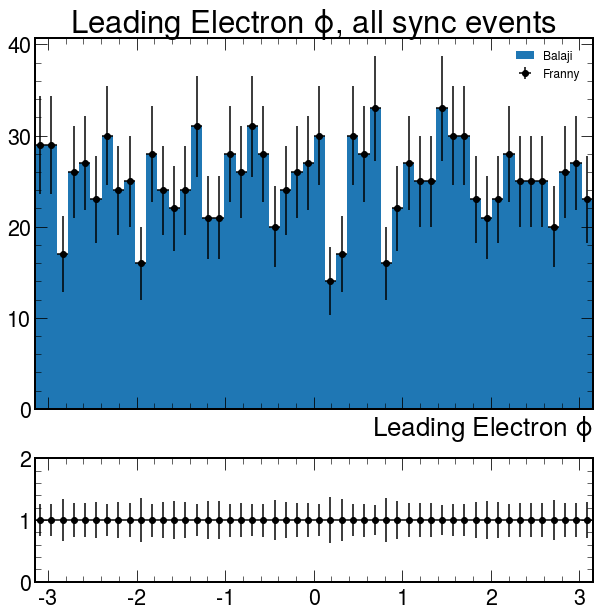

In [37]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 11, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 11 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Electron $\phi$")
plt.title("Leading Electron $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele1_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


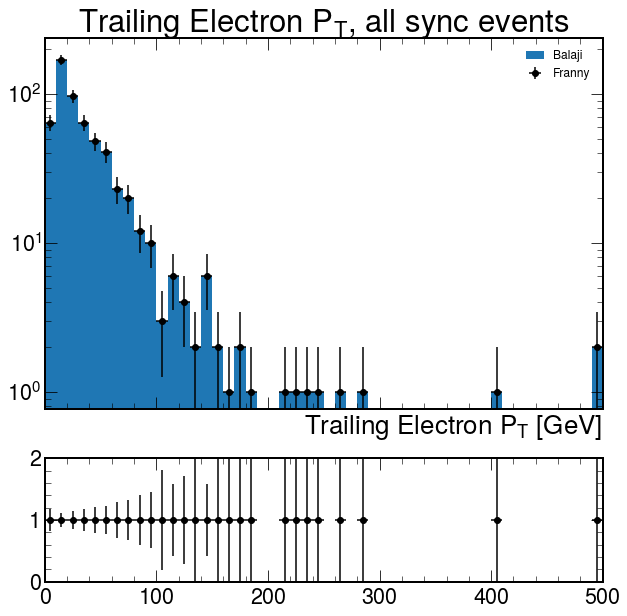

In [38]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Electron $P_T$ [GeV]")
plt.title("Trailing Electron $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


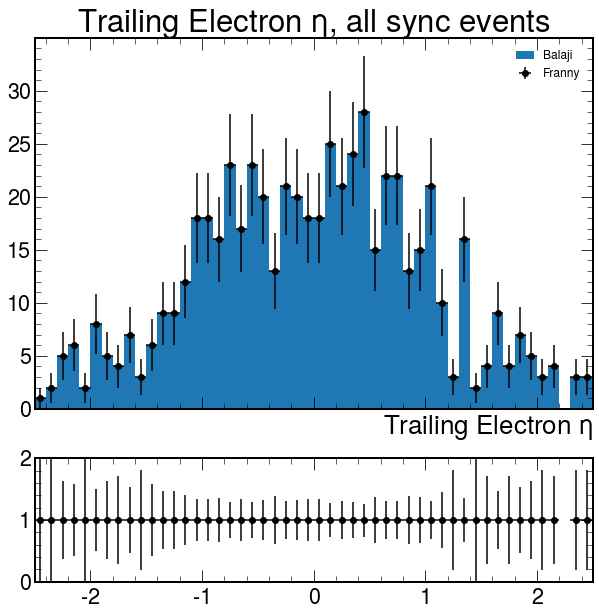

In [39]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Electron $\eta$")
plt.title("Trailing Electron $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


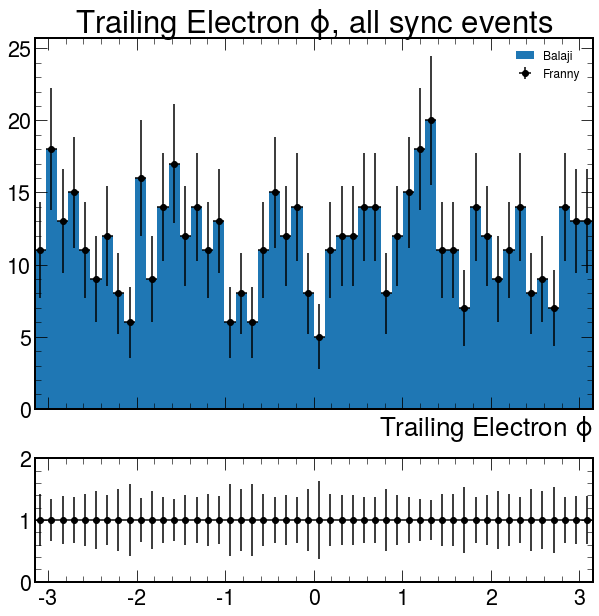

In [40]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 11, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 11 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Electron $\phi$")
plt.title("Trailing Electron $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("ele2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


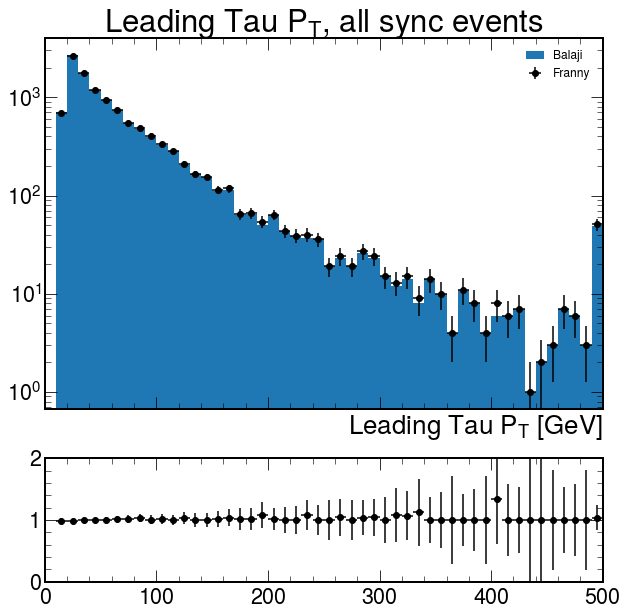

In [41]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Leading Tau $P_T$ [GeV]")
plt.title("Leading Tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


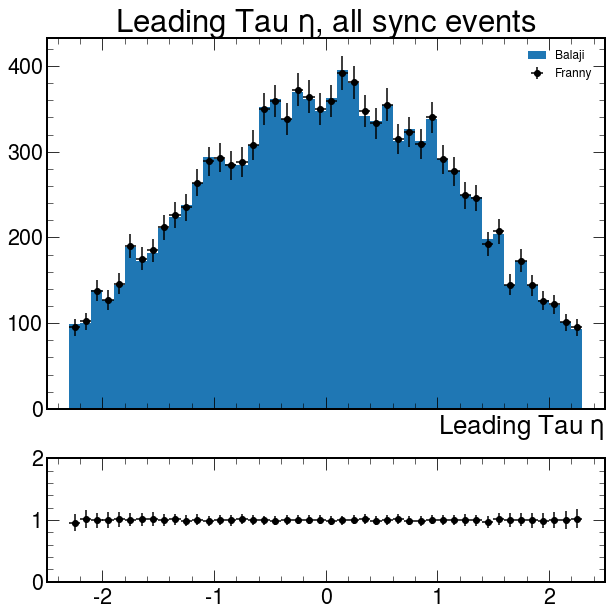

In [42]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Tau $\eta$")
plt.title("Leading Tau $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


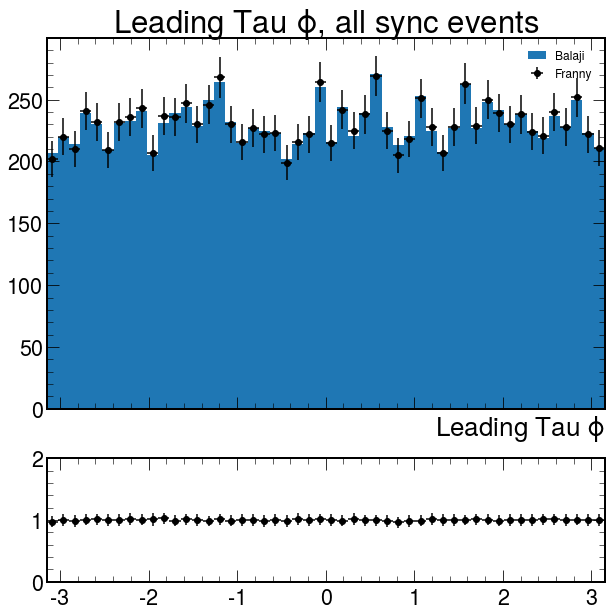

In [43]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep1_pdgId"]) == 15, "lep1_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep1_pdgID"]) == 15 , "lep1_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Leading Tau $\phi$")
plt.title("Leading Tau $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau1_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


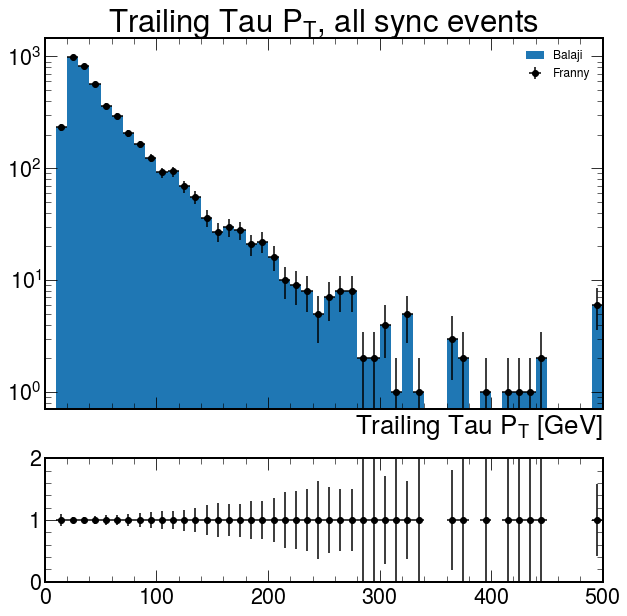

In [44]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_pt"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_pt"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Trailing Tau $P_T$ [GeV]")
plt.title("Trailing Tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_pt.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


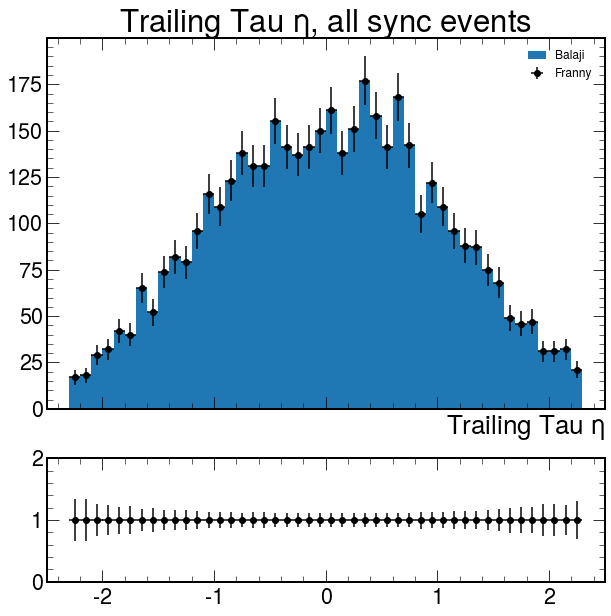

In [45]:
mgg_binning = "50, -2.5, 2.5" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_eta"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_eta"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Tau $\eta$")
plt.title("Trailing Tau $\eta$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_eta.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


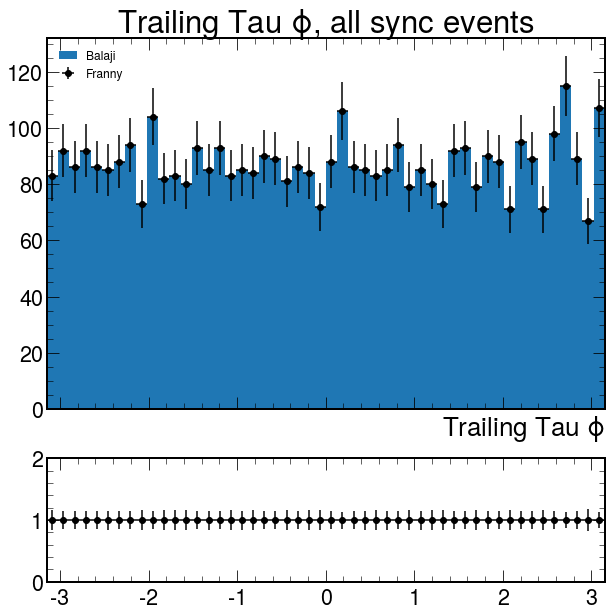

In [46]:
mgg_binning = "50, -3.15, 3.15" # ROOT convention


balaji_toFill = df_balaji.loc[abs(df_balaji["lep2_pdgId"]) == 15, "lep2_phi"] # select by process, then select the quantity
franny_toFill = df_franny.loc[abs(df_franny["lep2_pdgID"]) == 15 , "lep2_phi"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.xlabel("Trailing Tau $\phi$")
plt.title("Trailing Tau $\phi$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("tau2_phi.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


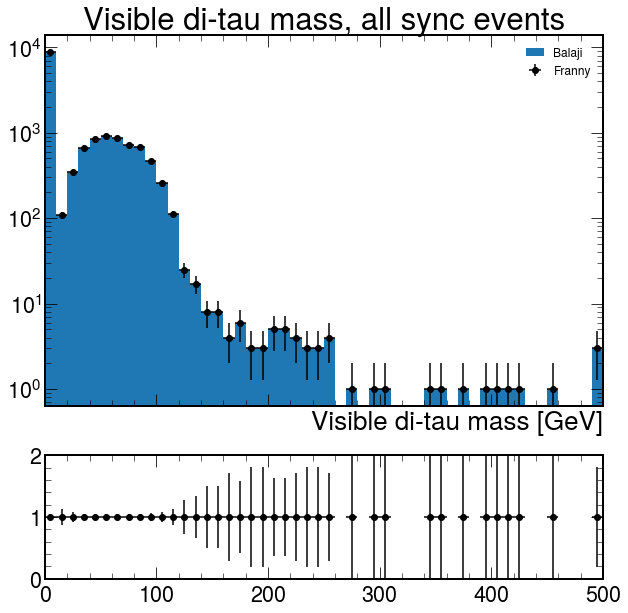

In [47]:
mgg_binning = "50, 0, 500" # ROOT convention


balaji_toFill = df_balaji["m_tautau_vis"] # select by process, then select the quantity
franny_toFill = df_franny["m_tautau_vis"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Visible di-tau mass [GeV]")
plt.title("Visible di-tau mass, all sync events")
ax1.legend(fontsize=12)
plt.savefig("m_tautau_vis.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


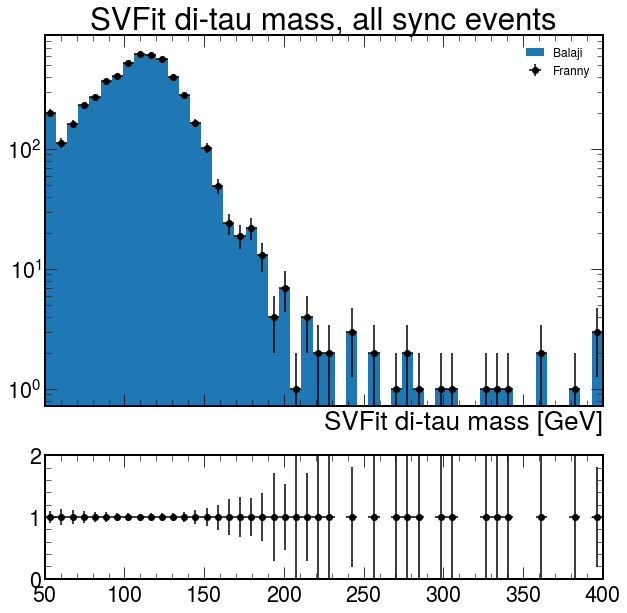

In [48]:
mgg_binning = "50, 50, 400" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "m_tautau_SVFit"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "m_tautau_SVFit"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("SVFit di-tau mass [GeV]")
plt.title("SVFit di-tau mass, all sync events")
ax1.legend(fontsize=12)
plt.savefig("m_tautau_SVFit.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


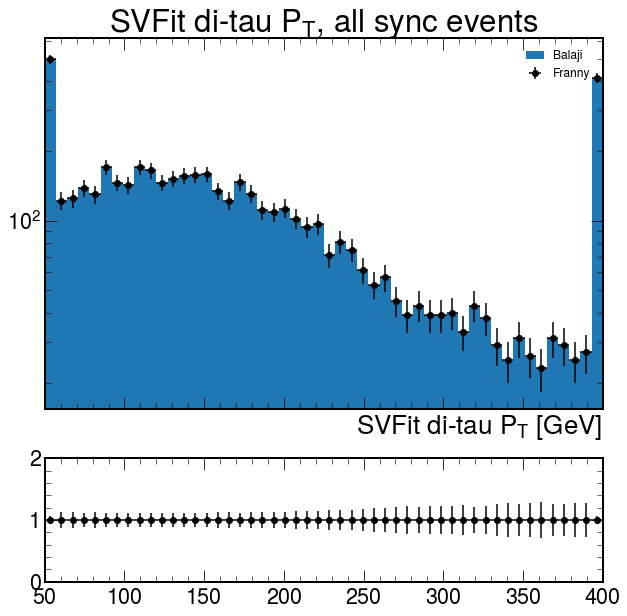

In [49]:
mgg_binning = "50, 50, 400" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "pt_tautau_SVFit"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "pt_tautau_SVFit"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("SVFit di-tau $P_T$ [GeV]")
plt.title("SVFit di-tau $P_T$, all sync events")
ax1.legend(fontsize=12)
plt.savefig("pt_tautau_SVFit.pdf")

'texgyreheros-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


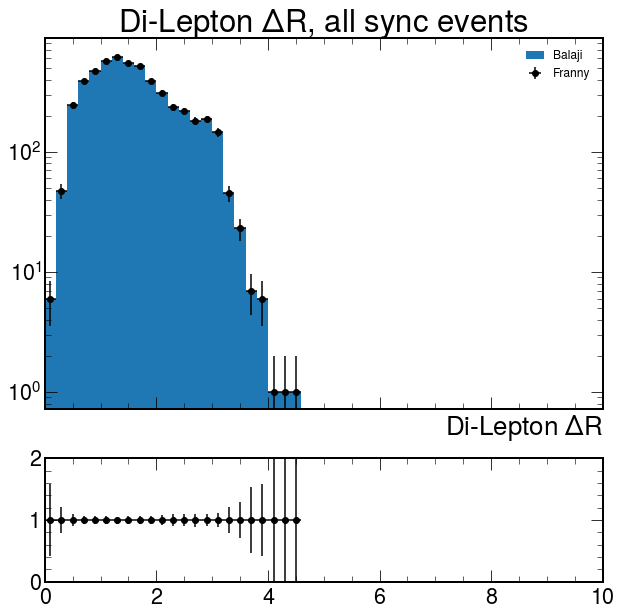

In [50]:
mgg_binning = "50,0,10" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["Category"] <= 6, "lep12_dR"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["Category"] <= 6, "lep12_dr"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Di-Lepton $\Delta$R")
plt.title("Di-Lepton $\Delta$R, all sync events")
ax1.legend(fontsize=12)
plt.savefig("lep12_dR.pdf")

### The "not-so-nice" ones

In [51]:
df_balaji.columns

Index(['phi_tautau_SVFit', 'eta_tautau_SVFit', 'lep12_dR', 'pt_tautau_SVFit',
       'lep12_deta', 'MET_dil_dphi', 'lep2_id_vs_j', 'Category', 'lep2_charge',
       'lep2_pdgId', 'lep2_id_vs_m', 'lep2_mass', 'lep2_tightID',
       'lep1_id_vs_j', 'gg_cosTheta_helicity', 'gg_dPhi', 'gg_dR',
       'g2_pixVeto', 'weight', 'MET_gg_dphi', 'process_id', 'g1_ptmgg',
       'lep2_eta', 'phi_tautau_vis', 'g1_pt', 'g2_ptmgg', 'lep2_phi', 'g1_phi',
       'n_jets', 'gg_pt', 'year', 'g2_phi', 'g1_eta', 'm_tautau_vis',
       'lep2_id_vs_e', 'g2_pt', 'g2_eta', 'g1_idmva', 'mgg', 'eta_tautau_vis',
       'm_tautau_SVFit', 'g2_idmva', 'g1_pixVeto', 'n_bjets', 'lep1_charge',
       'lep1_id_vs_m', 'jet1_pt', 'lep1_id_vs_e', 'jet1_eta', 'lep2_pt',
       'jet1_bTag', 'MET_pt', 'jet1_id', 'gg_phi', 'pt_tautau_vis', 'MET_phi',
       'jet2_pt', 'gg_eta', 'jet2_bTag', 'lep12_dphi', 'jet2_id', 'lep1_pt',
       'lep1_eta', 'lep1_pdgId', 'jet2_eta', 'lep1_phi', 'lep1_mass',
       'lep1_tightID'],
      dt

In [52]:
df_franny.loc[df_franny["process_id"] == -1, ["gg_hel", "mgg"]]

,gg_hel,mgg
2707,-0.372064,124.968559
2708,-0.222580,125.682785
2709,NaN,123.583061
2710,NaN,127.082161
2711,0.636518,123.353951
...,...,...
11720,0.708133,122.630959
11721,0.975541,125.616974
11722,-0.219785,122.697800
11723,0.527371,123.700523


In [60]:
df_balaji["gg_cosTheta_helicity_flashgg"]

0       -0.599389
1        0.619025
2        0.603376
3        0.458048
4       -0.695302
           ...   
14784    0.579827
14785    0.682224
14786   -0.836969
14787   -0.169279
14788    0.583043
Name: gg_cosTheta_helicity_flashgg, Length: 14789, dtype: float32

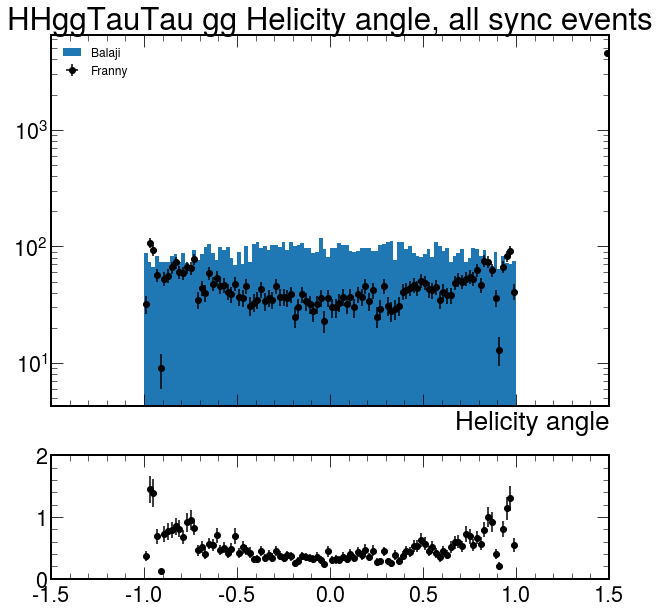

In [62]:
mgg_binning = "150,-1.5,1.5" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["process_id"] == -1, "gg_cosTheta_helicity_flashgg"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["process_id"] == -1, "gg_hel"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Helicity angle")
plt.title("HHggTauTau gg Helicity angle, all sync events")
ax1.legend(fontsize=12)


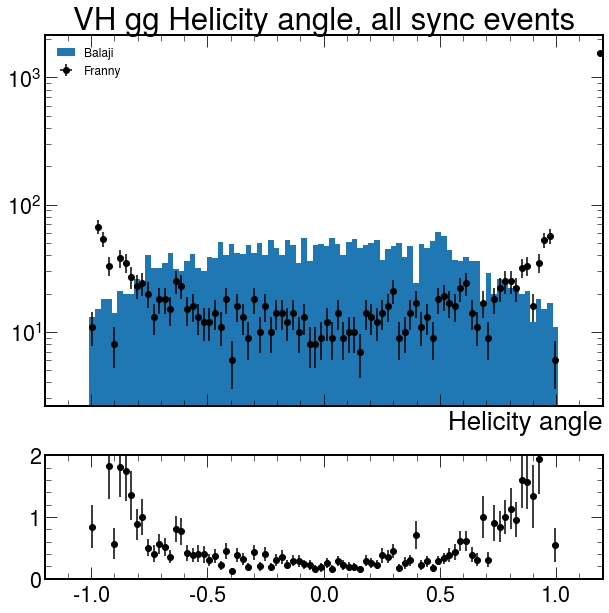

In [64]:
mgg_binning = "100,-1.2,1.2" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["process_id"] == 9, "gg_cosTheta_helicity_flashgg"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["process_id"] == 9, "gg_hel"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
plt.yscale("log")
plt.xlabel("Helicity angle")
plt.title("VH gg Helicity angle, all sync events")
ax1.legend(fontsize=12)


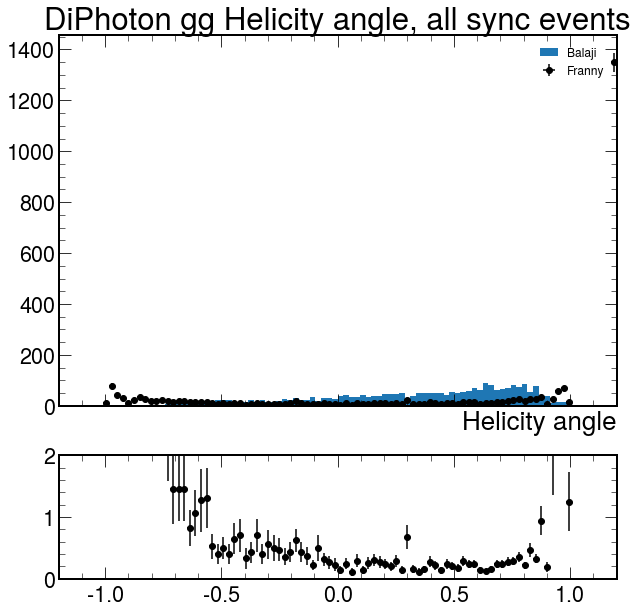

In [55]:
mgg_binning = "100,-1.2,1.2" # ROOT convention


balaji_toFill = df_balaji.loc[df_balaji["process_id"] == 3, "gg_cosTheta_helicity"] # select by process, then select the quantity
franny_toFill = df_franny.loc[df_franny["process_id"] == 3, "gg_hel"]

balaji_hist = Hist1D(balaji_toFill.values, bins=mgg_binning)
franny_hist = Hist1D(franny_toFill.values, bins=mgg_binning)

fig, (ax1, ax2) = plt.subplots(2, sharex=True, gridspec_kw=dict(height_ratios=[3, 1]))
balaji_hist.plot(label="Balaji", ax=ax1, histtype="stepfilled")
franny_hist.plot(show_errors="True", color="k", label="Franny", ax=ax1)

ratio_hist = franny_hist.copy()
ratio_hist /= balaji_hist
plt.sca(ax2)
ratio_hist.plot(ax=ax2, show_errors=True, color="k")
ax2.set_ylim([0,2])
plt.sca(ax1)
#plt.yscale("log")
plt.xlabel("Helicity angle")
plt.title("DiPhoton gg Helicity angle, all sync events")
ax1.legend(fontsize=12)


In [56]:
df_balaji.loc[df_balaji["process_id"] == 3, "gg_cosTheta_helicity"].min()

-0.75126475